# **CSI 382 - Data Mining and Knowledge Discovery**

# **Lab 7 - Hierarchical and k-means clustering**

Clustering refers to the grouping of records, observations, or cases into classes of similar objects. A cluster is a collection of records that are similar to one another and dissimilar to records in other clusters.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading the dataset**

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/19. occupancy_data.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 20560 rows and 8 columns.


# **Selecting Data for clustering analysis**

Here we are selecting data attributes for clustering analysis. For the sake of simplicity we are selecting only the following attributes:

1.Light
2.CO2


In [3]:
X = df.iloc[:, [5, 6]].values

# **Issues in clustering**

Detarmine the value of k:

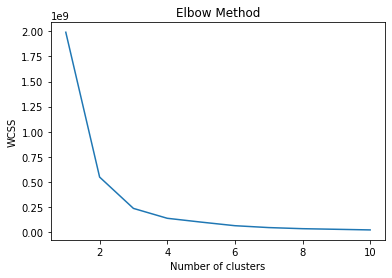

In [6]:
from sklearn.cluster import KMeans
# (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see in the above figure, the above plot is visualized as a hand and we need to identify the location of the elbow on the X-axis. In the above plot, the elbow seems to be on point 3 of X-axis. So, the optimal number of clusters will be 3 for the K-Means algorithm.

# **Hierarchical Clustering Methods**

In hierarchical clustering, a treelike cluster structure (dendrogram) is created
through recursive partitioning (divisive methods) or combining (agglomerative)
of existing clusters.

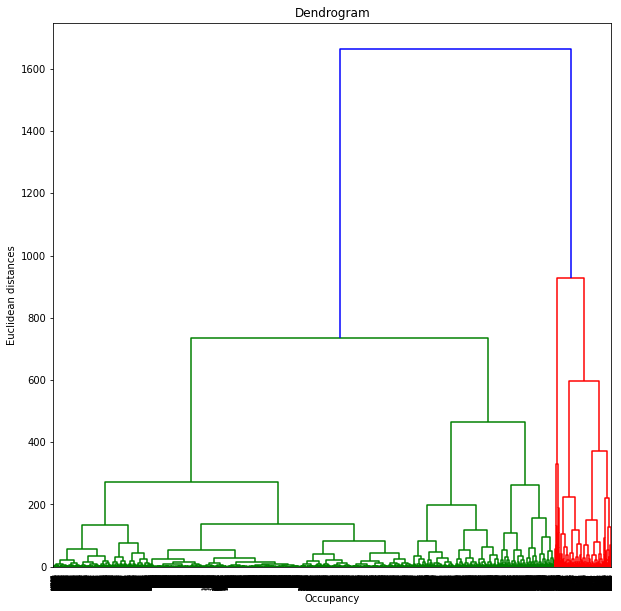

In [7]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Occupancy')
plt.ylabel('Euclidean distances')
plt.show()

# **Aggolomerative Clustering**
Agglomerative clustering methods [1] initialize each observation to be a tiny
cluster of its own. Then, in succeeding steps, the two closest clusters are aggre-
gated into a new combined cluster. In this way, the number of clusters in the data
set is reduced by one at each step.

## **Single linkage**

Single linkage, sometimes termed the nearest-neighbor approach, is based on
the minimum distance between any record in cluster A and any record in cluster
B. In other words, cluster similarity is based on the similarity of the most
similar members from each cluster.

In [8]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

y_hc = hc.fit_predict(X)

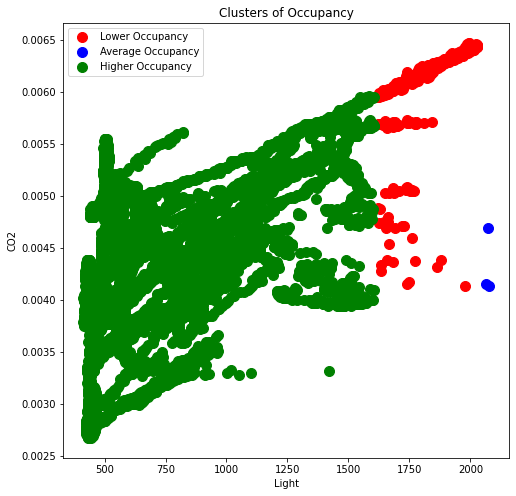

In [9]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Lower Occupancy')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Average Occupancy')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Higher Occupancy')
plt.title('Clusters of Occupancy')
plt.xlabel('Light')
plt.ylabel('CO2')
plt.legend()
plt.show()

## **Complete linkage**
Complete linkage, sometimes termed the farthest-neighbor approach, is based
on the maximum distance between any record in cluster A and any record in
cluster B.In other words, cluster similarity is based on the similarity of the
most dissimilar members from each cluster.


In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

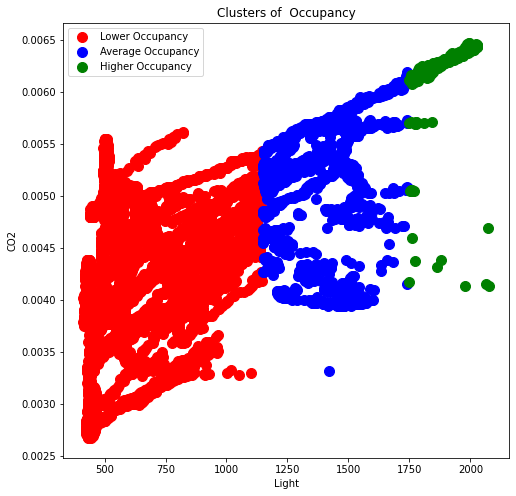

In [11]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Lower Occupancy')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Average Occupancy')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Higher Occupancy')
plt.title('Clusters of  Occupancy')
plt.xlabel('Light')
plt.ylabel('CO2')
plt.legend()
plt.show()

## **Average linkage**
Average linkage is designed to reduce the dependence of the cluster-linkage criterion on extreme values, such as the most similar or dissimilar records. In
average linkage, the criterion is the average distance of all the records in
cluster A from all the records in cluster B.



In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(X)

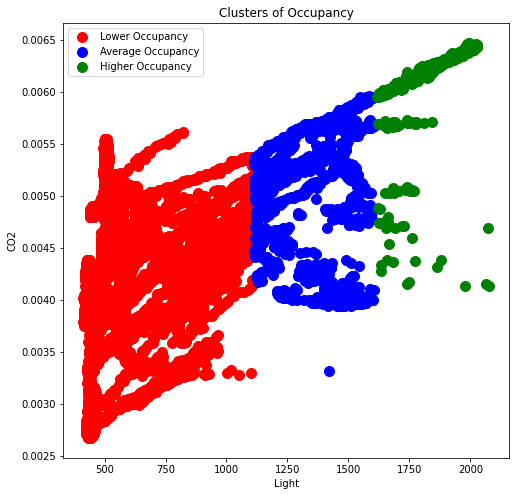

In [13]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Lower Occupancy')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Average Occupancy')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Higher Occupancy')
plt.title('Clusters of Occupancy')
plt.xlabel('Light')
plt.ylabel('CO2')
plt.legend()
plt.show()

## **Ward linkage**
Ward´s linkage is a method for hierarchical cluster analysis . The idea has much in common with analysis of variance (ANOVA). The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster.



In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

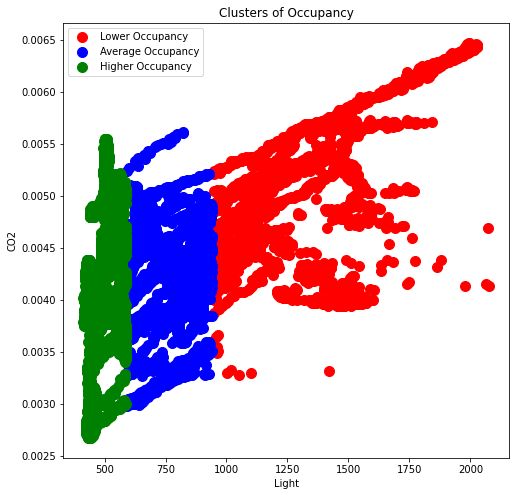

In [15]:
# Visualising the clusters

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Lower Occupancy')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Average Occupancy')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Higher Occupancy')
plt.title('Clusters of Occupancy')
plt.xlabel('Light')
plt.ylabel('CO2')
plt.legend()
plt.show()

# **k-means Clustering**
K-means [2] defines a prototype in terms of a centroid, which is usually the
mean of a group of points, and is typically applied to objects in a continuous
n-dimensional space. Interestingly, a centroid almost never corresponds to an
actual data point. In this section, we will focus on K-means, which is one of the
oldest and most widely used clustering algorithms.

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

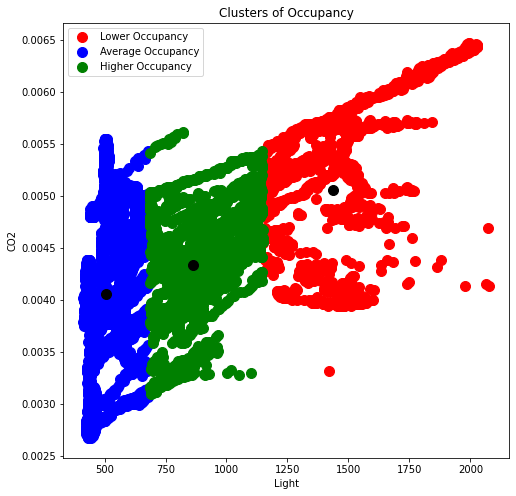

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Lower Occupancy')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Average Occupancy')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Higher Occupancy')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.title('Clusters of Occupancy')
plt.xlabel('Light')
plt.ylabel('CO2')
plt.legend()
plt.show()

**Different configuration(K-Means clustering)**

**1. Temperature and Humidity:**

In [18]:
X = df.iloc[:, [3,4]].values

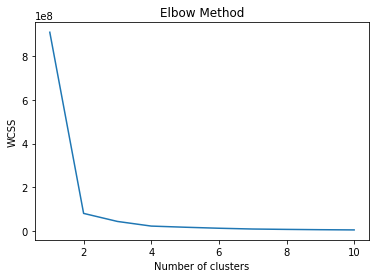

In [19]:
from sklearn.cluster import KMeans
# (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see in the above figure, the above plot is visualized as a hand and we need to identify the location of the elbow on the X-axis. In the above plot, the elbow seems to be on point 2 of X-axis. So, the optimal number of clusters will be 2 for the K-Means algorithm.

In [23]:
kmeans = KMeans(n_clusters = 2, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

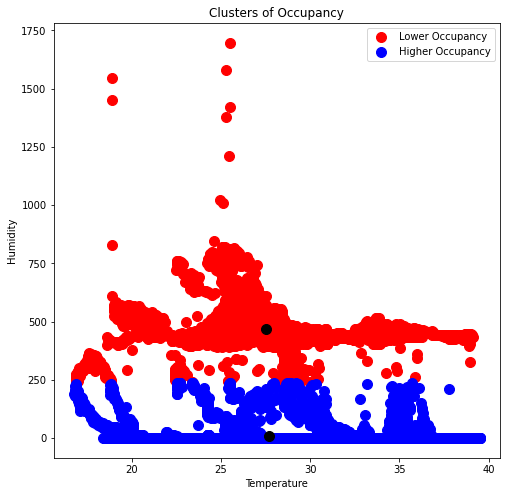

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Lower Occupancy')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Higher Occupancy')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black')
plt.title('Clusters of Occupancy')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend()
plt.show()